# Anderson Localization
Consider the following Hamiltonian in 1-D
$$H = -\sum_j J\left[\,\left|\, j\,\right\rangle\left\langle\, j+1\,\right| +h.c.\right]+ \sum_j\varepsilon_j \left|\, j\,\right\rangle\left\langle\, j\,\right|$$
The state $\left|\, j\,\right\rangle$ represents an exitation in the $j$-th lattice site. This can be interpreted as a quasi-particle on the $j$-th site.

The first term in the Hamiltonian represents the hopping between nearest neighbor, and the second term represents a random landscape. $\varepsilon_j$ are random numbers uniformly distributed in $[-\frac{W}{2}, \frac{W}{2}]$.


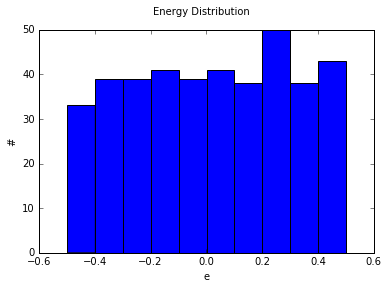

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

grid = 401
W = 1.
e = np.zeros(grid)
for i in range(grid):
    e[i] = np.random.uniform(-W/2, W/2)
plt.hist(e, 10)
plt.suptitle('Energy Distribution')
plt.xlabel('e')
plt.ylabel('#')
plt.show()

Assume the system starts out being in spin up in the middle lattice

In [47]:
state = np.zeros(grid)
state[grid/2-1] = 1. #initial state
Hamiltonian = np.diag(e)
J = 0.2
for j in range(grid-1):
    Hamiltonian[j][j+1] = -J
    Hamiltonian[j+1][j] = -J

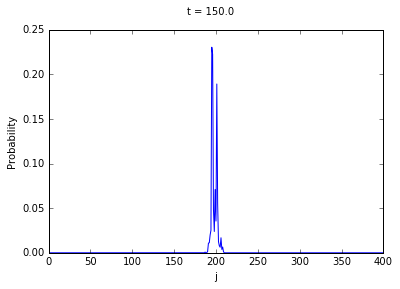

In [48]:
final_t = 15000
dt = 0.01
for t in range(final_t):
    state = state - 1j*Hamiltonian.dot(state)*dt
    state = state / np.sqrt(np.sum(np.absolute(state)**2))
x = np.arange(grid)
prob = np.absolute(state)**2
plt.plot(x, prob)
plt.suptitle('t = '+str(final_t*dt))
plt.xlabel('j')
plt.ylabel('Probability')
plt.show()

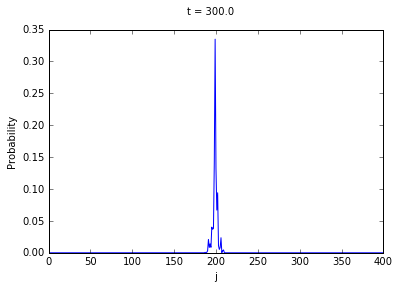

In [49]:
for t in range(final_t):
    state = state - 1j*Hamiltonian.dot(state)*dt
    state = state / np.sqrt(np.sum(np.absolute(state)**2))
prob = np.absolute(state)**2
plt.plot(x, prob)
plt.suptitle('t = '+str(2*final_t*dt))
plt.xlabel('j')
plt.ylabel('Probability')
plt.show()

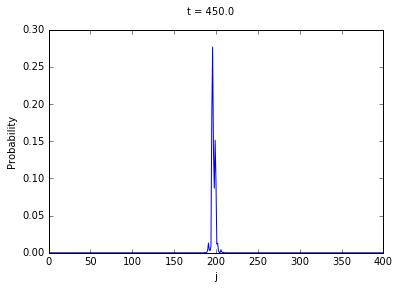

In [50]:
for t in range(final_t):
    state = state - 1j*Hamiltonian.dot(state)*dt
    state = state / np.sqrt(np.sum(np.absolute(state)**2))
prob = np.absolute(state)**2
plt.plot(x, prob)
plt.suptitle('t = '+str(3*final_t*dt))
plt.xlabel('j')
plt.ylabel('Probability')
plt.show()

From the figures shown above, we can see that under the weak hopping condition ($J/W = 0.2$), the quasi-particle is localized after time evolution.
Now let's examine the strong-hopping case.

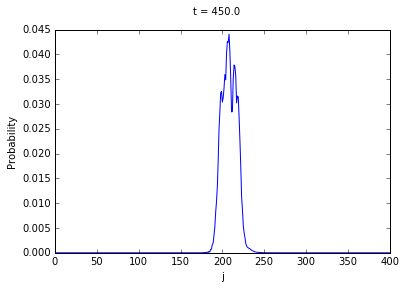

In [51]:
J = 5.
state = np.zeros(grid)
state[grid/2-1] = 1. #initial state
Hamiltonian = np.diag(e)
for j in range(grid-1):
    Hamiltonian[j][j+1] = -J
    Hamiltonian[j+1][j] = -J
final_t = 45000
for t in range(final_t):
    state = state - 1j*Hamiltonian.dot(state)*dt
    state = state / np.sqrt(np.sum(np.absolute(state)**2))
x = np.arange(grid)
prob = np.absolute(state)**2
plt.plot(x, prob)
plt.suptitle('t = '+str(final_t*dt))
plt.xlabel('j')
plt.ylabel('Probability')
plt.show()

We can see that the probability density spreads out under the condition $J/W = 5.0$.